[Source](https://iitmcvg.github.io/summer_school/Session3/)

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Image Gradients

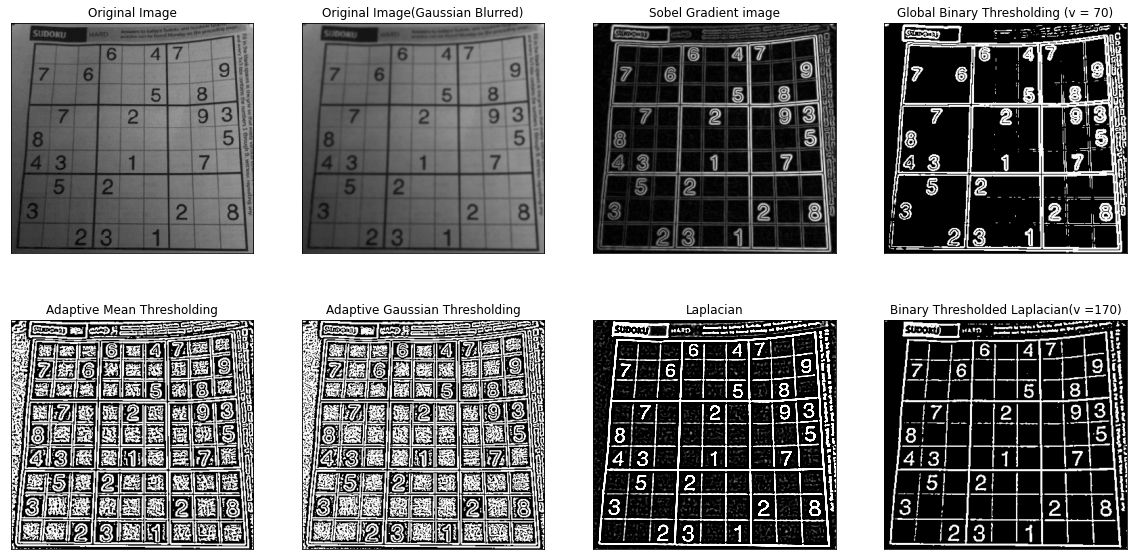

In [4]:
#cv2.Sobel(src img in grayscale, o/p img depth, xorder, yorder, ksize)
#depths CV_8U,CV_16U/CV_16S,CV_32F,CV_64F
img0 = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
img = cv.GaussianBlur(img0, (5, 5), 0)

#sobel gradient calculation
#I_x = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
#I_y = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)

#Sobel is only an approximation of the derivative. OpenCV addresses this inaccuracy for kernels of size 3 by using the Scharr function
I_x = cv.Scharr(img,cv.CV_64F,1,0)
I_y = cv.Scharr(img,cv.CV_64F,0,1)

#calculate the gradient magnitude of vectors
# |grad(sobel Output)| = sqrt(I_x**2 + I_y**2)
gradient = np.sqrt(np.power(I_x, 2*np.ones(I_x.shape)) + np.power(I_y, 2*np.ones(I_y.shape)))
gradient = ((gradient / np.max(gradient)) * 255).astype('uint8') # mapping values from 0 to 255

#dst=cv.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])
laplacian = cv.Laplacian(img,cv.CV_64F,ksize=5)

#Thresholding
maxi = 250
ret, th1 = cv.threshold(gradient,70,maxi,cv.THRESH_BINARY)

#dst=cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]	)
th2 = cv.adaptiveThreshold(gradient,maxi,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,7,2)
th3 = cv.adaptiveThreshold(gradient,maxi,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,7,2)

ret, th4 = cv.threshold(laplacian,170,maxi,cv.THRESH_BINARY)

fig, axes  = plt.subplots(2,4, sharex='all', sharey='all', figsize=(20,10))
img_dict = {'Original Image':img0, 'Original Image(Gaussian Blurred)':img, 'Sobel Gradient image':gradient, 
            'Global Binary Thresholding (v = 70)':th1, 'Adaptive Mean Thresholding':th2, 'Adaptive Gaussian Thresholding':th3, 
            'Laplacian':laplacian,'Binary Thresholded Laplacian(v =170)':th4}
i =0
for key in img_dict.keys():
    plt.subplot(2,4,i+1),plt.imshow(img_dict[key], cmap='gray', vmin = 0, vmax = 255)
    plt.title(key),plt.xticks([]),plt.yticks([])
    i+=1
